In [2]:
!pip install surprise

     |████████████████████████████████| 6.5MB 2.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678249 sha256=866c7bd6c34af982e911785f3261a32ca8fca652f615d888e1556294bc8b63c9
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise.model_selection import train_test_split
from surprise import Dataset,Reader
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate
from collections import defaultdict
from surprise import SVD


### Reading Data

> The data is uploaded to IBM cloud and to read the same, i have used the inbuilt code, which gets automatically populated when i import the dataset to the code. 
    Steps Done
    1. Click on 'Find and Add' button on Top Left to upload the file.
    2. Click an empty cell and click on 'Add to Code' below the uploaded file

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ratings_Electronics.csv")  

## Question 1.Read and explore the given dataset. (2.5 Marks)
1. Rename column/add headers
2. Plot histograms
3. Find data characteristics

####  1. Renaming the headers 
> The headers were were not named properly, hence they had to be renamed

In [6]:
file.shape


(7824481, 4)

In [0]:
ratings=file.copy()

In [8]:
ratings.columns=['userId','productId','rating','timeStamp']
ratings.head()

,userId,productId,rating,timeStamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [9]:
ratings.drop('timeStamp',axis=1,inplace=True)
ratings.head()

,userId,productId,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


#### 2. Plotting the Histogram to check the distribution of Ratings given by Users

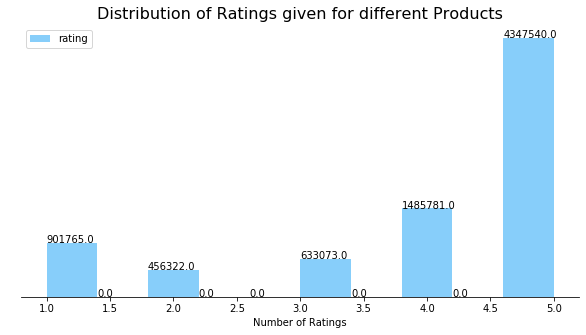

In [10]:
ax=ratings.plot(kind='hist',color='lightskyblue',figsize=(10,5))
plt.title('Distribution of Ratings given for different Products',fontsize=16)
plt.xlabel('Number of Ratings')
plt.ylabel(' ')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height + 0.01))
    

#### 3. Checking the charachterstics

In [11]:
for i,cname in enumerate(ratings.columns):
    print('{} has datatype ratings "{}"" '.format(cname, ratings[cname].dtype))

userId has datatype ratings "object"" 
productId has datatype ratings "object"" 
rating has datatype ratings "float64"" 


In [12]:
np.round(ratings.describe(),3)

,rating
count,7824481.000
mean,4.012
std,1.381
min,1.000
25%,3.000
50%,5.000
75%,5.000
max,5.000


## Question 2. Take a subset of the dataset to make it less sparse/ denser. (2.5 Marks)
> For example, keep the users only who has given 50 or more number of ratings )

####  Finding the unique users mapped along with the number of ratings they have given


In [13]:
Users=ratings['userId'].value_counts()
Users.head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userId, dtype: int64

#### Converting the series into a DataFrame

In [0]:
Users=pd.DataFrame(Users)
Users=Users.reset_index()
Users.columns=['userId','Count']

#### Creating a list with the User ID of people who have given ratings more than 50 times

In [0]:
filteredUsers=Users['userId'][Users['Count']>50].tolist()

#### The System was not able to process the dataset. Hence creating a smaller Subset by choosing products which are rated more than 100 times



In [0]:
products=pd.DataFrame(ratings['productId'].value_counts())
products.reset_index(inplace=True)
products.columns=['productId','counts']
products=products.sort_values(by='counts',ascending=False)

In [0]:
filteredProducts=products['productId'][products['counts']>100].tolist()

#### Creating a new DataFrame with users who gave ratings more than 50 times

In [0]:
rating=ratings[ratings['userId'].isin(filteredUsers) & ratings['productId'].isin(filteredProducts)]

#### Plotting the Histogram for the new Dataframe

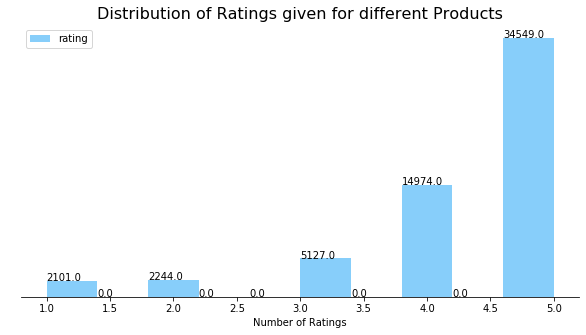

In [19]:
ax=rating.plot(kind='hist',color='lightskyblue',figsize=(10,5))
plt.title('Distribution of Ratings given for different Products',fontsize=16)
plt.xlabel('Number of Ratings')
plt.ylabel(' ')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}'.format(height), (x, y + height + 0.01))

##  Question 3. Split the data randomly into train and test dataset. (2.5 Marks)
> For example, split it in 70/30 ratio

#### Using the train_test_split operation from surprise library to split the data.
> The data has to be converted to surprise format by using Dataset_lod_from_df to use the above function.

In [20]:
rating.shape

(58995, 3)

In [21]:
reader = Reader(rating_scale=(1, 5))
s_rating = Dataset.load_from_df(rating[['userId','productId', 'rating']], reader)
s_rating

In [0]:
train, test = train_test_split(s_rating, test_size=.30,random_state=123)

## Question 4. Build a Popularity Recommender model. - (20 Marks)

#### Since s_rating is in Surprise format and as surprise library is based of mathematical functions like mean, we are using the old dataset rating

In [23]:
rating_enhanced=rating.groupby('productId')['rating'].mean().sort_values(ascending=False)
rating_enhanced.head()

productId
B003JOETX8    5.0
B0042KYJ88    5.0
B004433ZG0    5.0
B00440D7W0    5.0
B0043VE26U    5.0
Name: rating, dtype: float64


#### Now the data is sorted as per the top ratings and the above 5 products will be recommended. . But the problem is if a movie is rated 5 start by 1 person, then that also comes to the top of the list. 


In [24]:
rating_enhanced.reset_index
rating_enhanced_pd=pd.DataFrame(rating.groupby('productId')['rating'].mean())
rating_enhanced_pd.head()

,rating
productId,
0972683275,5.0
1400501466,3.0
1400501776,4.5
1400532620,3.0
1400532655,3.6


In [25]:
rating_enhanced_pd.reset_index(inplace=True)
rating_enhanced_pd.head()

,productId,rating
0,0972683275,5.0
1,1400501466,3.0
2,1400501776,4.5
3,1400532620,3.0
4,1400532655,3.6


In [26]:
count=pd.DataFrame(rating.groupby('productId')['rating'].count())
count.reset_index(inplace=True)
count.head()

,productId,rating
0,0972683275,3
1,1400501466,5
2,1400501776,2
3,1400532620,2
4,1400532655,5


In [27]:
p_recommender=rating_enhanced_pd.merge(count,on='productId')
p_recommender.columns=['productId','rating','count']
p_recommender.head()

,productId,rating,count
0,0972683275,5.0,3
1,1400501466,3.0,5
2,1400501776,4.5,2
3,1400532620,3.0,2
4,1400532655,3.6,5


In [28]:
p_recommender.sort_values('count',ascending=False).head()

,productId,rating,count
8250,B0088CJT4U,4.215686,204
4945,B003ES5ZUU,4.858757,177
1822,B000N99BBC,4.773006,163
8096,B007WTAJTO,4.692308,156
8172,B00829TIEK,4.431507,146


#### Now the data is sorted based on popularity and the top 4 movies with high ratings will be recommened to user. 
>However, this can still have drawbacks. If many people have rated a movie low, then it would also be on the list. 

In [29]:
new_recommender=p_recommender[(p_recommender['rating']>4) & (p_recommender['count']>50)]
new_recommender.sort_values(by='rating',ascending=False).head()

,productId,rating,count
2810,B0019EHU8G,4.894118,85
3531,B001TH7GUU,4.864865,74
4945,B003ES5ZUU,4.858757,177
7590,B006W8U2MU,4.821429,56
2000,B000QUUFRW,4.804878,82


#### Now we have a better recommendation system based on Popularity

## Question 5.Build a Collaborative Filtering model. - (20 Marks)


In [30]:


collFilter = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
collFilter.fit(train)

# run the trained model against the testset
testResult = collFilter.test(test)

# get RMSE
print("Item-Item Collaborative Filtering : Test Set")
accuracy.rmse(testResult, verbose=True)

# if you wanted to evaluate on the trainset
print("Item-Item Colllaborative Filtering : Training Set")
trainResult = collFilter.test(train.build_testset())
accuracy.rmse(trainResult)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Item-Item Collaborative Filtering : Test Set
RMSE: 1.1061
Item-Item Colllaborative Filtering : Training Set
RMSE: 0.0184


0.01838591502060354

In [31]:
print(testResult)

[Prediction(uid='A14Z6D3IRJ23F7', iid='B0049XV5LM', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}), Prediction(uid='A3GVXKCTFN3YDN', iid='B000REECKS', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}), Prediction(uid='A35X2JJI49OBZP', iid='B000M2GYF6', r_ui=5.0, est=4.833333333333333, details={'actual_k': 0, 'was_impossible': False}), Prediction(uid='A2QI2NTDTMK2FV', iid='B005ZNHOW4', r_ui=3.0, est=4.310611197210384, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}), Prediction(uid='A18S2VGUH9SCV5', iid='B001E78UQY', r_ui=4.0, est=3.8, details={'actual_k': 0, 'was_impossible': False}), Prediction(uid='A2LEIANN1UZTHP', iid='B00E055H5O', r_ui=4.0, est=4.6923076923076925, details={'actual_k': 0, 'was_impossible': False}), Prediction(uid='AFHYEO3Y1IIDD', iid='B00829TIEK', r_ui=5.0, est=5, details={'actual_k': 3, 'was_impossible': False}), Prediction(uid='A4IL0CLL27Q33', iid='B0053T4PHC', r_ui=5.0, est=4.5, details={'actual_k': 0

### The model has a score of 0.018 on Train data and 1.106 in Test Data.
It shows that the model has not performed well.


#### Checking if the performance changes in SVD


In [43]:
svd_model=SVD(n_factors=50,reg_all=0.03)
svd_model.fit(train)

In [0]:
svd_pred=svd_model.test(test)

In [45]:
accuracy.rmse(svd_pred)

RMSE: 0.9455


0.9454675839444023

#### We have a lower Root Mean Square error after using Singular Value Decomposition. 


In [0]:
from surprise.model_selection import GridSearchCV
param = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
svd_tuned = GridSearchCV(SVD, param, measures=['rmse'], cv=3,refit = True)


In [0]:
svd_tuned.fit(s_rating)

In [59]:
svd_tuned.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.01}}

In [60]:
accuracy.rmse(svd_tuned.test(test))

RMSE: 0.8476


0.8475544972005639

#### The error has further decreased with Hyper Tuning


## Question 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.


In [0]:
test_predict=svd_tuned.test(test)

In [0]:
top_5 = defaultdict(list)
for user, iid, true_r, est, _ in test_predict:
   top_n[uid].append((iid, est))

for user, user_ratings in top_n.items():
  user_ratings.sort(key=lambda x: x[1], reverse=True)
  top_n[user] = user_ratings[:5]



In [0]:
for uid, user_ratings in top_n.items():
    print(user, [iid for (iid, _) in user_ratings])

## 8. Summarise your insights (7.5 marks)

> 1. The dataset contained around **7 million datapoints** which was not easy to process.
> 2. Hence we *filtered out people who gave more than 50 ratings*.
> 3. The new dataframe was still big and it was having processing issues in Collaborative filtering. 
> 4. The same code was exported to google Colab and IBM watson, but the memory error was still occuring
> 5. Hence the data was filtered again, based on *products which are rated more than 100 times*. So the final filtered data has only Users who have rated more than 50 products, and products which have recived more than 100 ratings. This helped to bring down the data size to **58995 rows**

> 6. By Using** Popularity based filtering**, there was an issue that even if a product is rated once with 5 starts, it can make to the top recommndations.
> > Hence, we *filtered out the data based on ratings and rating counts* to make an enhanced popularity based recommendation system

> 7. By Using a **Item Item Collaborative filter** , we got a **RMSE of 1.10 on test set** and** 0.018 on train set**. Hence to enhance the system, **Singular Value Decomposition** was tried out


> 8. With SVD, the **RMSE reduced to 0.945**.

> 9. With **Hyper Parameter tuning the RMSE to 0.847**


